In [9]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.interpolation import rotate
from scipy import ndimage

In [0]:
bee = cv2.imread('/content/drive/My Drive/bee.jpg')

In [0]:
# let's make a function
def imshowBGR2RGB( im ):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  return

In [10]:
print(bee.shape)

#dimension 0: Upsampling in Y dimension
#dimension 1: Upsampling in X demension
#dimension 3: Upsampling in X and Y demension
def quadruple(I,size,dimension,kernel):
  image_h, image_w, image_channel = I.shape[0], I.shape[1], I.shape[2]
  if dimension == 0:
    padding = np.zeros((image_h*size,image_w,image_channel))
    padding[::size] = I
  elif dimension == 1:
    padding = np.zeros((image_h,image_w*size,image_channel))
    padding[::,::size] = I
  elif dimension == 3:
    padding = np.zeros((image_h*size,image_w*size,image_channel))
    padding[::size,::size] = I
  return cv2.filter2D(padding,-1,kernel)
  
kernel_1 = np.transpose(np.array([[1/4,2/4,3/4,1,3/4,2/4,1/4]]))
res = quadruple(bee,4,0,kernel_1)
kernel_2 = np.array([[1/4,2/4,3/4,1,3/4,2/4,1/4]])
res1 = quadruple(res,4,1,kernel_2)
cv2.imwrite("/content/drive/My Drive/bee_new.jpg",res1)

kernel_3 = kernel_1.dot(kernel_2)
res2 = quadruple(bee,4,3,kernel_3)
cv2.imwrite("/content/drive/My Drive/bee_new1.jpg",res1)
print(kernel_3)



(170, 172, 3)
[[0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]
 [0.125  0.25   0.375  0.5    0.375  0.25   0.125 ]
 [0.1875 0.375  0.5625 0.75   0.5625 0.375  0.1875]
 [0.25   0.5    0.75   1.     0.75   0.5    0.25  ]
 [0.1875 0.375  0.5625 0.75   0.5625 0.375  0.1875]
 [0.125  0.25   0.375  0.5    0.375  0.25   0.125 ]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


True

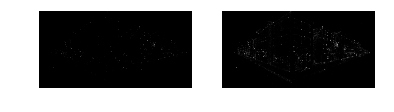

In [85]:
building = cv2.imread('/content/drive/My Drive/building.jpg')
building_gray = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)


def Non_suppression(I):
  out = I.copy()
  height,width = I.shape
  for i in range(1,height-1):
    for j in range(1,width-1):
      patch = I[i-1:i+2, j-1:j+2]
      if np.argmax(patch) == 4 and patch.max()>90:
        out[i][j] = 255
      else:
        out[i][j] = 0
  return out

def Harris(I,threshold):
  blur = cv2.GaussianBlur(I,(5,5),7)
  Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
  Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
  IxIy = np.multiply(Ix, Iy)
  Ix2 = np.multiply(Ix, Ix)
  Iy2 = np.multiply(Iy, Iy)
  Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
  Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
  IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 
  det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
  trace = Ix2_blur + Iy2_blur
  R = det - 0.05 * np.multiply(trace,trace)
  R[R<threshold] = 0
  return R
res = Harris(building_gray,0.01)
plt.subplot(1,2,1),plt.imshow(res,cmap = 'gray'), plt.axis('off')
new_res = cv2.normalize(res, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
final_res = Non_suppression(new_res)

cv2.imwrite("/content/drive/My Drive/Harris.jpg",new_res)
def Brown(I):
  blur = cv2.GaussianBlur(I,(5,5),7)
  Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
  Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
  IxIy = np.multiply(Ix, Iy)
  Ix2 = np.multiply(Ix, Ix)
  Iy2 = np.multiply(Iy, Iy)
  Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
  Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
  IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 
  det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
  trace = Ix2_blur + Iy2_blur
  mean = np.divide(det,trace+0.01)
  return mean
res1 = Brown(building_gray)
plt.subplot(1,2,2),plt.imshow(res1,cmap = 'gray'), plt.axis('off')
new_res1 = cv2.normalize(res1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
final_res1 = Non_suppression(new_res1)
cv2.imwrite("/content/drive/My Drive/Brown.jpg",final_res1)

 


True

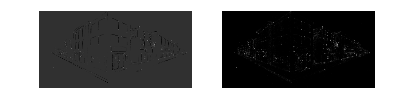

In [36]:
def eigenvalue(I,Ix2,Iy2,IxIy):
  height, width = I.shape[0],I.shape[1]
  lamda_0_m = np.zeros((height,width))
  lamda_1_m = np.zeros((height,width))
  for i in range(height):
    for j in range(width):
      pixel_Ix2 = Ix2[i][j]
      pixel_Iy2 = Iy2[i][j]
      Pixel_IxIy = IxIy[i][j]
      M = np.array([[pixel_Ix2,Pixel_IxIy],[Pixel_IxIy,pixel_Iy2]])
      lamda_0 = np.linalg.eigvals(M)[0]
      lamda_1 = np.linalg.eigvals(M)[1]
      lamda_0_m[i][j] = lamda_0
      lamda_1_m[i][j] = lamda_1
  return [lamda_0_m,lamda_1_m]

def Harris_without(I):
  blur = cv2.GaussianBlur(I,(5,5),7)
  Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
  Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
  IxIy = np.multiply(Ix, Iy)
  Ix2 = np.multiply(Ix, Ix)
  Iy2 = np.multiply(Iy, Iy)
  Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
  Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
  IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 
  L0,L1 = eigenvalue(I,Ix2_blur,Iy2_blur,IxIy_blur)
  L0L1 = np.multiply(L0,L1)
  L0_plus_L1 = L0+L1
  R = L0L1- 0.05*np.multiply(L0_plus_L1,L0_plus_L1)
  return R
res = Harris_without(building_gray)
plt.subplot(1,2,1),plt.imshow(res,cmap = 'gray'), plt.axis('off')
new_res = cv2.normalize(res, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
final_res = Non_suppression(new_res)
cv2.imwrite("/content/drive/My Drive/Harris_without.jpg",final_res)


def Brown_without(I):
  blur = cv2.GaussianBlur(I,(5,5),7)
  Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
  Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
  IxIy = np.multiply(Ix, Iy)
  Ix2 = np.multiply(Ix, Ix)
  Iy2 = np.multiply(Iy, Iy)
  Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
  Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
  IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 
  L0,L1 = eigenvalue(I,Ix2_blur,Iy2_blur,IxIy_blur)
  L0L1 = np.multiply(L0,L1)
  L0_plus_L1 = L0+L1
  mean = np.divide(L0L1,L0_plus_L1+0.01)
  return mean

res1 = Brown_without(building_gray)
plt.subplot(1,2,2),plt.imshow(res1,cmap = 'gray'), plt.axis('off')
new_res1 = cv2.normalize(res1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
final_res1 = Non_suppression(new_res1)
cv2.imwrite("/content/drive/My Drive/Brown_without.jpg",final_res1)




True

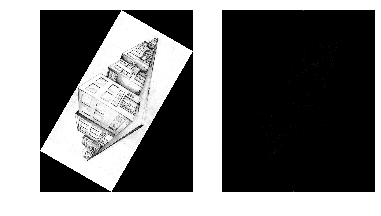

In [100]:
rotated = rotate(building_gray, angle=60)
# rows,cols = building_gray.shape
# rotated = cv2.getRotationMatrix2D((cols/2,rows/2),60,1)
# dst = cv2.warpAffine(building_gray,rotated,(cols,rows))
plt.subplot(1,2,1),plt.imshow(rotated,cmap = 'gray'), plt.axis('off')
cv2.imwrite("/content/drive/My Drive/rotated.jpg",rotated)

res = Harris(rotated,0.01)
plt.subplot(1,2,2),plt.imshow(res,cmap = 'gray'), plt.axis('off')
new_res = cv2.normalize(res, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
final_res = Non_suppression(new_res)
cv2.imwrite("/content/drive/My Drive/rotated_harris.jpg",new_res)

In [113]:
building = cv2.imread('/content/drive/My Drive/building.jpg')
building.shape

(1012, 1996, 3)

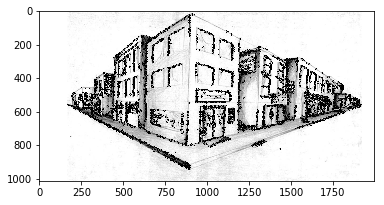

In [196]:

def Laplacian(I,ksize,sigma):
  gaussian = cv2.GaussianBlur(I,(ksize,ksize),sigma)
  return cv2.Laplacian(gaussian,-1)

sigma = 2
s = 7
k = 2**(1/s)

sigma_array = [2]
for i in range(0,s-1):
  sigma_array.append(sigma_array[-1]*k)
Log = []

for i in range(0,s):
  Log.append(Laplacian(building_gray,5,sigma_array[i]))

Log_padded = []
height, width = building_gray.shape[0],building_gray.shape[1]

for i in range(0,s):
  padded = np.zeros((height+2,width+2))
  padded[1:height+1,1:width+1] = Log[i]
  Log_padded.append(padded)
  
Octave = np.concatenate([o[:,:,np.newaxis] for o in Log_padded], axis=2)
keypoints = {}
Octave[:,:,0] = 0
Octave[:,:,-1] = 0

for i in range(1,height+1):
  for j in range(1,width+1):
    for k in range(1,Octave.shape[2]-1):
      patch = Octave[i-1:i+2, j-1:j+2, k-1:k+2]
      if np.argmax(patch) == 13 or np.argmin(patch) == 13:
        if np.abs(patch[1][1][1]) >= 16 and np.abs(patch[1][1][1]) <= 35:
          if (i,j) not in keypoints:
            keypoints[(i,j)] = sigma_array[k]

new_building1 = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
for key in keypoints.keys():
  cv2.circle(new_building1,(key[1],key[0]), radius=3*int(keypoints[key]),color=(0,0,255),thickness=1)

  
plt.imshow(new_building1,cmap = 'gray')

  

In [197]:
cv2.imwrite("/content/drive/My Drive/new_building111.jpg",new_building1)

True

True

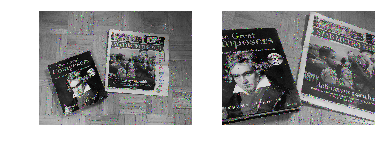

In [14]:
# 4
sample1 = cv2.imread('/content/drive/My Drive/sample1.jpg')
sample2 = cv2.imread('/content/drive/My Drive/sample2.jpg')

def SIFT(I):
  sift = cv2.xfeatures2d.SIFT_create()
  kp, des = sift.detectAndCompute(I,None)
  img = cv2.drawKeypoints(I,kp,None)#flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
  return img

sample1_gray = cv2.cvtColor(sample1, cv2.COLOR_BGR2GRAY)
sample2_gray = cv2.cvtColor(sample2, cv2.COLOR_BGR2GRAY)
res1 = SIFT(sample1_gray)
res2 = SIFT(sample2_gray)

plt.subplot(1,2,1),imshowBGR2RGB(res1)
plt.subplot(1,2,2),imshowBGR2RGB(res2)
cv2.imwrite("/content/drive/My Drive/new_sample1.jpg",res1)
cv2.imwrite("/content/drive/My Drive/new_sample2.jpg",res2)



In [0]:

def sift_matching(img1,img2,threshold,norm_type):
  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)
  matched_pair = {}
  for i in range(len(kp1)):
    difference = des1[i,:] - des2
    differnece_abs = np.abs(difference)
    if norm_type == 1: #L1 norm
      res = np.sum(differnece_abs,axis=1)
    elif norm_type == 2: #L2 norm
      res_sum = np.sum(differnece_abs**2,axis=1)
      res = res_sum**(1/2)
    elif norm_type == 3: #L3 norm
      res_sum = np.sum(differnece_abs**3,axis=1)
      res = res_sum**(1/3)
    index_sorted = np.argsort(res)[:2]
    smallest = index_sorted[0]
    second_smallest = index_sorted[1]
    ratio = res[smallest] / res[second_smallest]
    if ratio < threshold:
      matched_pair[ratio] = (kp1[i],kp2[smallest])

  return matched_pair

sample1_gray = cv2.cvtColor(sample1, cv2.COLOR_BGR2GRAY)
sample2_gray = cv2.cvtColor(sample2, cv2.COLOR_BGR2GRAY)
  

In [0]:
for i in range(1,10):
  threshold = i/10
  print(len(sift_matching(sample1_gray,sample2_gray,threshold,2)))

In [0]:
for i in range(1,10):
  threshold = i/10
  print(len(sift_matching(sample1_gray,sample2_gray,threshold,1)))

In [0]:
for i in range(1,10):
  threshold = i/10
  print(len(sift_matching(sample1_gray,sample2_gray,threshold,3)))

In [0]:
#result = sift_matching(sample1_gray,sample2_gray,0.8,2)
#result = sift_matching(sample1_gray,sample2_gray,0.8,1)
result = sift_matching(sample1_gray,sample2_gray,0.8,3)

In [0]:
#result from sift_matching function
def find_kp(result):
  points_in_img1 = []
  points_coordinate_img1 = []
  points_in_img2 = []
  points_coordinate_img2 = []
  count = 0
  for key in sorted(result):
    if count == 10:
      break
    img1_pt = (int(result[key][0].pt[0]),int(result[key][0].pt[1]))
    img2_pt = (int(result[key][1].pt[0]),int(result[key][1].pt[1]))
    if img1_pt not in points_coordinate_img1:
      points_in_img1.append(result[key][0])
      points_coordinate_img1.append(img1_pt)
      points_in_img2.append(result[key][1])
      points_coordinate_img2.append(img2_pt)
      count += 1
  return points_in_img1,points_coordinate_img1,points_in_img2,points_coordinate_img2


In [0]:
points_in_img1,points_coordinate_img1,points_in_img2,points_coordinate_img2 = find_kp(result)

In [188]:
sample1 = cv2.imread('/content/drive/My Drive/sample1.jpg')
# for i in range(10):
#   print(points_in_img1[i].pt)
sample1_gray = cv2.cvtColor(sample1, cv2.COLOR_BGR2GRAY)
new_res = cv2.drawKeypoints(sample1_gray,points_in_img1,None,color=(0,0,255))
cv2.imwrite("/content/drive/My Drive/A2_output/L3-1.png",new_res)

True

In [189]:
sample2 = cv2.imread('/content/drive/My Drive/sample2.jpg')
# for i in range(10):
#   print(points_in_img2[i].pt)
sample2_gray = cv2.cvtColor(sample2, cv2.COLOR_BGR2GRAY)
new_res2 = cv2.drawKeypoints(sample2_gray,points_in_img2,None,color=(0,0,255))
cv2.imwrite("/content/drive/My Drive/A2_output/L3-2.png",new_res2)


True

In [0]:
def draw_lines(new_res,new_res2,points_coordinate_img1,points_coordinate_img2):
  offset = new_res.shape[1]
  combine_image = np.concatenate((new_res,new_res2),axis = 1)
  for i in range(10):
    coordinate1_x = int(points_coordinate_img1[i][0])
    coordinate1_y = int(points_coordinate_img1[i][1])
    coordinate1 = (coordinate1_x,coordinate1_y)
    coordinate2_x = int(points_coordinate_img2[i][0] + offset)
    coordinate2_y = int(points_coordinate_img2[i][1])
    coordinate2 = (coordinate2_x, coordinate2_y)
    cv2.line(combine_image,coordinate1,coordinate2,(0,255,0),2)
  cv2.imwrite("/content/drive/My Drive/A2_output/noise_sift333.png",combine_image)


In [0]:
draw_lines(new_res,new_res2,points_coordinate_img1,points_coordinate_img2)

In [0]:
def add_noise(I):
  row,col = I.shape
  new_img = I/255
  mean = 0
  sigma = 0.08
  gaussian = np.random.normal(mean,sigma,(row,col))
  image_with_noise = new_img + gaussian
  for i in range(row):
    for j in range(col):
      if image_with_noise[i][j] < 0:
        image_with_noise[i][j] = 0

      if image_with_noise[i][j] > 1:
        image_with_noise[i][j] = 1
  return image_with_noise*255

sample1 = cv2.imread('/content/drive/My Drive/sample1.jpg')
sample2 = cv2.imread('/content/drive/My Drive/sample2.jpg')
sample1_gray = cv2.cvtColor(sample1, cv2.COLOR_BGR2GRAY)
sample2_gray = cv2.cvtColor(sample2, cv2.COLOR_BGR2GRAY)

image1_with_noise = add_noise(sample1_gray).astype(np.uint8)
image2_with_noise = add_noise(sample2_gray).astype(np.uint8)
  
  

In [0]:
for i in range(1,10):
  threshold = i/10
  print(len(sift_matching(image1_with_noise,image2_with_noise,threshold,2)))

In [0]:
sift_img_with_noise_1 = SIFT(image1_with_noise)
sift_img_with_noise_2 = SIFT(image2_with_noise)


In [205]:
# plt.subplot(1,2,1),imshowBGR2RGB(sift_img_with_noise_1)
# plt.subplot(1,2,2),imshowBGR2RGB(sift_img_with_noise_2)
cv2.imwrite("/content/drive/My Drive/A2_output/image1_with_noise111.png",image1_with_noise)
cv2.imwrite("/content/drive/My Drive/A2_output/image2_with_noise222.png",image2_with_noise)
cv2.imwrite("/content/drive/My Drive/A2_output/sift_img_with_noise_111.png",sift_img_with_noise_1)
cv2.imwrite("/content/drive/My Drive/A2_output/sift_img_with_noise_222.png",sift_img_with_noise_2)

True

In [0]:
#result = sift_matching(image1_with_noise,image2_with_noise,0.8,2)
#result = sift_matching(image1_with_noise,image2_with_noise,0.8,1)
result = sift_matching(image1_with_noise,image2_with_noise,0.8,3)

In [231]:
points_in_img1,points_coordinate_img1,points_in_img2,points_coordinate_img2 = find_kp(result)
new_res = cv2.drawKeypoints(image1_with_noise,points_in_img1,None,color=(0,0,255))
cv2.imwrite("/content/drive/My Drive/A2_output/noise_sift_L3_1.png",new_res)

True

In [232]:
new_res2 = cv2.drawKeypoints(image2_with_noise,points_in_img2,None,color=(0,0,255))
cv2.imwrite("/content/drive/My Drive/A2_output/noise_sift_L3_2.png",new_res2)

True

In [0]:
draw_lines(new_res,new_res2,points_coordinate_img1,points_coordinate_img2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b8c291f60>, None)

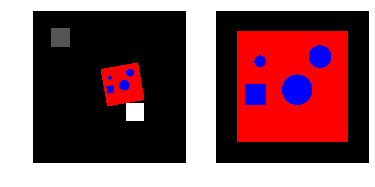

In [11]:
template = cv2.imread('/content/drive/My Drive/colourTemplate.png')
search = cv2.imread('/content/drive/My Drive/colourSearch.png')

template_blue_channel = template[:,:,0]
template_green_channel = template[:,:,1]
template_red_channel = template[:,:,2]

search_blue_channel = search[:,:,0]
search_green_channel = search[:,:,1]
search_red_channel = search[:,:,2]

plt.subplot(1,2,2),imshowBGR2RGB(template)
plt.subplot(1,2,1),imshowBGR2RGB(search)

In [0]:
result0 = sift_matching(template_blue_channel,search_blue_channel,0.8,2)
result1 = sift_matching(template_green_channel,search_green_channel,0.8,2)
result2 = sift_matching(template_red_channel,search_red_channel,0.8,2)

new_result = {**result0, **result1, **result2}

In [16]:
for i in range(1,10):
  threshold = i/10
  result0 = sift_matching(template_blue_channel,search_blue_channel,threshold,2)
  result1 = sift_matching(template_green_channel,search_green_channel,threshold,2)
  result2 = sift_matching(template_red_channel,search_red_channel,threshold,2)
  new_result = {**result0, **result1, **result2}
  print(len(new_result))

0
2
4
13
16
21
28
33
61
87


In [0]:
points_in_img1,points_coordinate_img1,points_in_img2,points_coordinate_img2 = find_kp(new_result)

new_res = cv2.drawKeypoints(template,points_in_img1,None,color=(0,255,0))
cv2.imwrite("/content/drive/My Drive/A2_output/last1.png",new_res)
new_res2 = cv2.drawKeypoints(search,points_in_img2,None,color=(0,255,0))
cv2.imwrite("/content/drive/My Drive/A2_output/last2.png",new_res2)


In [0]:
row1,col1,ch1 = new_res.shape
image_padded = np.zeros((row1,col1,ch1))
row2,col2,ch2 = new_res2.shape
image_padded[:row2,:col2,:ch2] = new_res2

draw_lines(new_res,image_padded,points_coordinate_img1,points_coordinate_img2)
